# <img src="../leo_ipynb_title_icon.jpeg" alt="Logo" style="height: 2em; vertical-align: middle;"/>Online Book Recommender System



# 1. Business Understanding  
---

## 1.1 Introduction  
The **Online Book Recommender System** aims to personalize user experiences by suggesting relevant books based on their preferences and behavior. With the growing volume of books available online, users often face **choice overload**, leading to decreased engagement.  

**Key Goals**:  
- Improve user retention and engagement.  
- Increase cross-selling/up-selling opportunities.  
- Solve the "cold-start" problem for new users/books.  

**Approach**:  
- **Collaborative Filtering**: Leverage user-book interactions (e.g., ratings).  
- **Content-Based Filtering**: Use book metadata (genre, author, descriptions).  
- **Hybrid Model**: Combine both for more accurate recommendations.  

---

## 1.2 Problem Statement  
**Core Objective**:  
> *"Build a ML system that recommends books to users based on their past behavior and book features, while addressing data sparsity and cold-start challenges."*  

**Challenges**:  
1. **Data Sparsity**: Most users rate very few books.  

2. **Cold Start**: No historical data for new users/books.  
3. **Diversity**: Avoiding over-specialization in recommendations.  

**Success Metrics**:  
- **Model**: RMSE (rating prediction), Precision@K (top-K recs).  
- **Business**: Increased CTR, reduced bounce rates.  

---

## 1.3 Key Stakeholders  
| Stakeholder          | Interest/Impact                                                                 |  
|----------------------|---------------------------------------------------------------------------------|  
| **End Users**        | Personalized book discoveries, better engagement.                               |  
| **Platform**         | Higher sales, improved retention (e.g., Amazon/Goodreads).                      |  
| **Publishers**       | Increased visibility for niche books.                                            |  
| **Data Team**        | Scalable models with measurable business impact.                                 |  

---



# 2. Data Understanding  
---
## 2.1. File Overview
We have 3 dataframes for this project namely `books_df.csv`, `ratings_df.csv` and `user_df.csv`

## 2.2 Load Data

In [1]:
import pandas as pd

# Read books data
books_df = pd.read_csv(
    '../books_df.csv',
    sep=';',
    encoding='latin1',
    quotechar='"',     # Handles fields enclosed in double quotes
    escapechar='\\'    # Handles escaped quotes inside those fields (e.g. \" )
)

# Read ratings data
ratings_df = pd.read_csv('../ratings_df.csv', sep=';', encoding='latin1')  # encoding to fix UnicodeDecodeError

# Read users data
users_df = pd.read_csv('../user_df.csv', sep=';', encoding='latin1')  # encoding to fix UnicodeDecodeError


## 2.3 Data Inspection

In [2]:
display(books_df.head(2))
books_df.info()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


- This dataframe contains info on the movies

In [3]:
display(ratings_df.head(2))
ratings_df.info()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


- This dataframes contains info on how different users rated different books

In [4]:
display(users_df.head(2))
users_df.info()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


- This dataframes contains info on different users

## 2.4 Dataset Features Description

### Books Dataset (`books_df`)
**Records**: 271,379 books | **Features**: 8

| Feature | Description |
|---------|-------------|
| ISBN | International Standard Book Number (unique identifier) |
| Book-Title | Complete title of the book including subtitles |
| Book-Author | Author(s) of the book |
| Year-Of-Publication | Original publication year of the edition |
| Publisher | Company/organization that published the book |
| Image-URL-S | URL for small thumbnail cover image |
| Image-URL-M | URL for medium-sized cover image |
| Image-URL-L | URL for large/high-resolution cover image |

---

### Ratings Dataset (`ratings_df`)  
**Records**: 1,149,780 ratings | **Features**: 3

| Feature | Description |
|---------|-------------|
| User-ID | Anonymous unique identifier of the rating user |
| ISBN | Book identifier (matches books_df) |
| Book-Rating | Numerical rating given by user (scale to be verified) |

---

### Users Dataset (`users_df`)  
**Records**: 278,858 users | **Features**: 3

| Feature | Description |
|---------|-------------|
| User-ID | Unique identifier (matches ratings_df) |
| Location | Free-text location description (e.g., "New York, NY, USA") |
| Age | Self-reported age in years |

## 3.1 Data Cleaning

### 3.1.1 Handling Missing Values

In [5]:
# initialize list of dfs
df_list =[books_df, ratings_df, users_df]

In [6]:
#check missing values
for df in df_list:
    display(df.isna().sum())


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

User-ID          0
Location         0
Age         110762
dtype: int64

- In **`books_df`** missing values represent  **0.0011055 %** of the data which is not statistically significant hence we shall drop rows with these missing values and represent a very small fraction of thes data with over 271,000 books.
- In **`users_df`** missing values in the `age` column represent **39.7198574 %** of the data. This is statistically significant. Before imputing/dropping the column we shall check whether there is a correlation between age and ratings

#### 3.1.1.1 Dropping missing values in `books_df`

In [7]:
# Drop missing values
books_df =books_df.dropna()

# verify drop
display(books_df.isna().sum())
display(books_df.shape)

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

(271376, 8)

#### 3.1.1.2 Handling missing values in `age` column, `users_df`

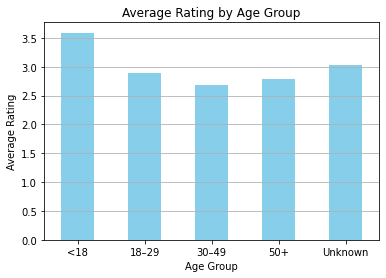

Available age-rating pairs: 840,288
Pearson Correlation Matrix:


,Age,Book-Rating
Age,1.000000,-0.028238
Book-Rating,-0.028238,1.000000


In [8]:

import matplotlib.pyplot as plt


# Merge ratings with user ages
age_ratings = pd.merge(
    ratings_df[['User-ID', 'Book-Rating']],
    users_df[['User-ID', 'Age']],
    on='User-ID',
    how='inner'
)

# Define age bins and labels
age_bins = [0, 18, 30, 50, 100]
age_labels = ['<18', '18–29', '30–49', '50+']

# Create age group with an "Unknown" category
users_df['Age_Group'] = pd.cut(users_df['Age'], bins=age_bins, labels=age_labels)
users_df['Age_Group'] = users_df['Age_Group'].cat.add_categories('Unknown').fillna('Unknown')

# Plot average rating by age group (excluding 'Unknown')
age_ratings = pd.merge(
    ratings_df[['User-ID', 'Book-Rating']],
    users_df[['User-ID', 'Age_Group']],
    on='User-ID',
    how='inner'
)


age_ratings.groupby('Age_Group')['Book-Rating'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Rating by Age Group')
plt.ylabel('Average Rating')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Correlation analysis on known ages
age_ratings_corr = pd.merge(
    ratings_df[['User-ID', 'Book-Rating']],
    users_df[['User-ID', 'Age']],
    on='User-ID',
    how='inner'
).dropna(subset=['Age'])

print(f"Available age-rating pairs: {len(age_ratings_corr):,}")
corr = age_ratings_corr[['Age', 'Book-Rating']].corr(method='pearson')
print("Pearson Correlation Matrix:")
display(corr)


#### Age Data Handling Strategy

- **Missing Age Values**: 110,762 out of 278,858 users (~39.7%) had missing ages.
- **Concern regarding imputaion**: Imputation may introduce noise because of the following reasons:
  1. A very weak correlation with ratings (r = -0.0282).
  2. Introduction of imputation bias due to high no of NaNs.

#### Stategy:
To better support content-based and hybrid recommendation systems:

- Age is **binned** into 4 discrete groups: `<18`, `18–29`, `30–49`, `50+`.
- Users with missing ages are placed into a separate **'Unknown'** category.
- This allows age to be retained as a categorical feature while avoiding noisy imputations.

This strategy preserves potentially useful demographic signals without compromising data quality or model robustness.


In [9]:
#drop column and verify
users_df = users_df.drop(columns= ['Age'])
users_df.columns

Index(['User-ID', 'Location', 'Age_Group'], dtype='object')

### 3.1.2 Handling Duplicates

- For this we shall check dataframes individually since some have some unique identifiers
#### `books_df`

In [10]:
#check duplicates
display(books_df['ISBN'].duplicated().sum())

0

- `books_df` has no duplicates
#### `ratings_df`


In [11]:
#check duplicates
display(ratings_df[['ISBN','User-ID']].duplicated().sum())

0

- `ratings_df` has no duplicates either
#### `users_df`


In [12]:
#check duplicates
display(users_df['User-ID'].duplicated().sum())

0

- `users_df` has no duplicates either.
- Thus, the datasets have no duplicates
- Data Cleaning is complete, there is no need to check for outliers in this project since `Age`column has already been dropped.

## 3.3 Dataset Merging

### 3.3.1 Validating keys before merging
- We shall check if the unique identifiers of `books_df` and `users_df` match those in `ratings_df`

In [13]:
# Check ISBN consistency between books and ratings
isbn_match = ratings_df['ISBN'].isin(books_df['ISBN']).mean() * 100
print(f"Ratings with valid ISBNs: {isbn_match:.2f}%")

# Check User-ID consistency between users and ratings
user_match = ratings_df['User-ID'].isin(users_df['User-ID']).mean() * 100
print(f"Ratings with valid User-IDs: {user_match:.2f}%")

Ratings with valid ISBNs: 89.68%
Ratings with valid User-IDs: 100.00%


### Data Consistency Summary

- **Valid ISBNs in ratings**: 89.68%  
~10% of ratings reference books not found in `books_df` (possibly due to typos, missing entries, or alternate ISBNs).  

- **Valid User-IDs in ratings**: 100.00%  
All ratings have matching users in `users_df`; user data is fully consistent.


### 3.3.2 Merge `ratings_df` with `books_df`

In [14]:
ratings_books = ratings_df.merge(
    books_df[['ISBN', 'Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']],
    on='ISBN',
    how='left'
)

print(f"Merged ratings-books shape: {ratings_books.shape}")
print(f"Unmatched ratings: {ratings_books['Book-Title'].isna().sum()}")

Merged ratings-books shape: (1149780, 7)
Unmatched ratings: 118608


### 3.3.3 Merge `ratings_books` with `users_df`
- This is done to get the info on location and age

In [15]:
users_df.columns

Index(['User-ID', 'Location', 'Age_Group'], dtype='object')

In [16]:
merged_df = ratings_books.merge(
    users_df[['User-ID', 'Location','Age_Group']],
    on='User-ID',
    how='left'
)

merged_df.sample(n=10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Year-Of-Publication,Location,Age_Group
544111,130571,0553256971,0,Dancing In the Light,Shirley MacLaine,Bantam Doubleday Dell,1986.0,"summerville, south carolina, usa",Unknown
619593,149909,0553581872,0,The Widow's Kiss,JANE FEATHER,Bantam,2002.0,"sungai petani, kedah, malaysia",18–29
1108541,265889,0722141041,0,Hotel De Luxe,Caroline Gray,Macdonald &amp; Co,1988.0,"kitchener, ontario, canada",18–29
67981,14173,0449905950,0,Stalking Horse,Bill Shoemaker,Ballantine Books,1994.0,"calgary, alberta, canada",Unknown
452196,108310,0671654160,0,"SHEEPFARMERS DAUGHTER (Deed of Paksenarrion, B...",Elizabeth Moon,Baen,1988.0,"stadthagen, niedersachsen, germany",18–29
132103,30511,0375414983,7,My Life as a Fake,PETER CAREY,Knopf,2003.0,"culemborg, gelderland, netherlands",Unknown
123510,28492,0140014845,0,Lady Chatterley's Lover,D.H. Lawrence,Penguin Books Ltd,1969.0,"slough, england, united kingdom",30–49
407763,98391,0380815354,9,Once Tempted,Elizabeth Boyle,Avon,2001.0,"morrow, georgia, usa",50+
28319,6575,0345402308,0,Fourth Procedure,STANLEY POTTINGER,Ballantine Books,1995.0,"seattle, washington, usa",Unknown
754377,182442,0449912124,0,S.,John Updike,Ballantine Books,1996.0,"ithaca, new york, usa",Unknown


In [17]:
merged_df['Book-Title'].isna().sum()

118608

### Handling Missing Book Metadata

- Approximately **10.31%** of the ratings (118,608 entries) have missing book metadata.
- This arises because these ISBNs are present in `ratings_df` but not found in `books_df`.
- Instead of dropping these records, we will retain all ratings since the ISBNs can be useful in **collaborative filtering** models.
- To keep track of such cases, we will introduce a flag indicating whether metadata is missing for each entry.


### 3.3.4 Feature Engineering
#### 3.3.4.1 Introducing tag for metadata

In [18]:
merged_df['Book-Title'].isna().sum()

118608

In [19]:
# Tag them for reference
merged_df['Missing_Metadata'] = merged_df['Book-Title'].isna()

In [20]:
len(merged_df[merged_df['Book-Title'].isna()])


118608

#### 3.3.4.1 Introducing column for country and city
- This will make it possible to observe trends in EDA phase

In [21]:
# Extract and clean country 
merged_df['Country'] = (
    merged_df['Location']
    .str.split(',')
    .str[-1]
    .str.strip()
    .str.title()
    .replace(['', 'N/A', 'Na', 'Null'], 'Unknown')
    .fillna('Unknown') 
)

# Extract and clean City (middle part)
merged_df['City'] = (
    merged_df['Location']
    .str.split(',')
    .str[1]
    .str.strip()
    .str.title()
    .replace(['', 'N/A', 'Na', 'Null'], 'Unknown')
    .fillna('Unknown')
)
#display top 10 countries
display(merged_df['Country'].value_counts().head(10))

#display top 10 cities
display(merged_df['City'].value_counts().head(10))

Usa               768068
Canada            103782
United Kingdom     50593
Unknown            41215
Germany            39675
Australia          26477
Spain              25742
France             13877
Italy              12147
Portugal           10518
Name: Country, dtype: int64

California    110462
Unknown        50005
Ontario        46080
Texas          45206
Florida        35265
Missouri       34057
Washington     32643
England        32483
Illinois       31563
New York       30738
Name: City, dtype: int64

- Display final merged dataset

In [22]:
display(merged_df.sample(n= 10, random_state= 42))

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Year-Of-Publication,Location,Age_Group,Missing_Metadata,Country,City
178554,38781,0373259131,0,"Otherwise Engaged (Harlequin Temptation, No 813)",Cara Summers,Harlequin,2001.0,"kingsville, texas, usa",30–49,False,Usa,Texas
533905,128835,0811805905,8,All Smiles,Bruce Velick,Chronicle Books,1995.0,"bellingham, washington, usa",50+,False,Usa,Washington
1091374,261829,037324486X,0,The Heart Beneath (Morgan's Mercenaries: Ult...,Lindsay Mckenna,Silhouette,2002.0,"fpo, ap, usa",30–49,False,Usa,Ap
1036247,247747,0531303306,0,Have You Been to the Beach Lately?: Poems,Ralph J. Fletcher,Orchard Books (NY),2001.0,"portsmouth, ohio, usa",Unknown,False,Usa,Ohio
309523,74076,0316812404,0,Revolution from Within: A Book of Self-Esteem,Gloria Steinem,Little Brown &amp; Co,1992.0,"victoria, british columbia, canada",50+,False,Canada,British Columbia
130089,30273,0312072376,0,Little Ways to Say I Love You,Marjabelle Young Stewart,St. Martin's Press,1992.0,"naples, florida, usa",18–29,False,Usa,Florida
60190,12110,0743431014,6,Songs of the Humpback Whale : A Novel in Five ...,Jodi Picoult,Washington Square Press,2001.0,"dracut, massachusetts, usa",30–49,False,Usa,Massachusetts
785993,189973,0515129283,0,A Hitch in Time (Time Passages Romance Series),Christine Holden,Jove Books,2000.0,"pittsburgh, pennsylvania, usa",Unknown,False,Usa,Pennsylvania
66929,13690,8485224574,6,NaN,NaN,NaN,NaN,"gijón, asturias, spain",50+,True,Spain,Asturias
405917,98391,006000181X,8,With Her Last Breath,Cait London,Avon,2003.0,"morrow, georgia, usa",50+,False,Usa,Georgia


# 4. Exploratory Data Analysis  

## 4.1 Univariate Analysis

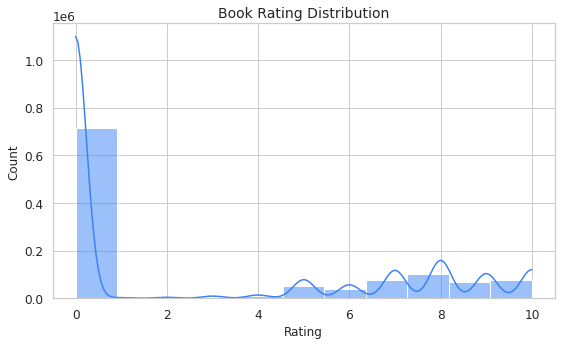

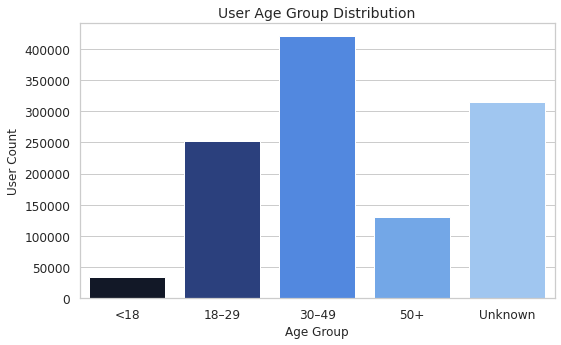

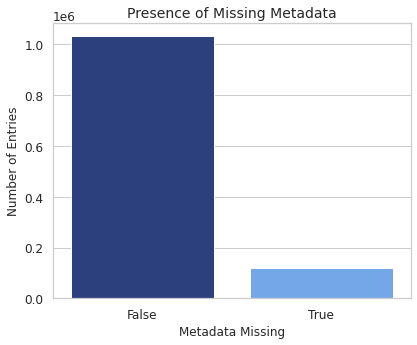

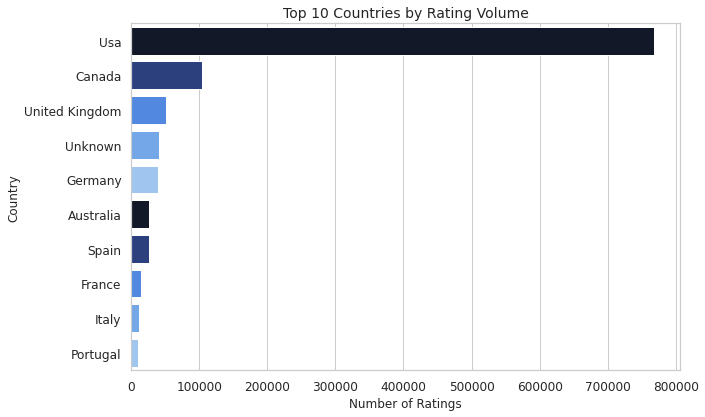

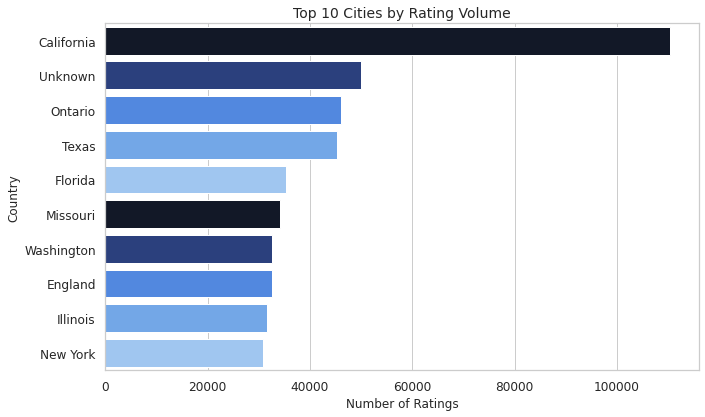

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="whitegrid", font_scale=1.1)
cool_blues = ['#0f172a', '#1e3a8a', '#3b82f6', '#60a5fa', '#93c5fd']
sns.set_palette(cool_blues)

# 1. Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Book-Rating'], bins=11, kde=True, color=cool_blues[2])
plt.title("Book Rating Distribution", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# 2. Age Group Distribution
plt.figure(figsize=(8, 5))
age_order = ['<18', '18–29', '30–49', '50+', 'Unknown'] if 'Unknown' in merged_df['Age_Group'].unique() else merged_df['Age_Group'].value_counts().index
sns.countplot(x='Age_Group', data=merged_df, order=age_order, palette=cool_blues)
plt.title("User Age Group Distribution", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.tight_layout()
plt.show()

# 3. Missing Metadata Flag
plt.figure(figsize=(6, 5))
sns.countplot(x='Missing_Metadata', data=merged_df, palette=[cool_blues[1], cool_blues[3]])
plt.title("Presence of Missing Metadata", fontsize=14)
plt.xlabel("Metadata Missing", fontsize=12)
plt.ylabel("Number of Entries", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Top 10 Countries by Rating Volume
plt.figure(figsize=(10, 6))
top_countries = merged_df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette=cool_blues)
plt.title("Top 10 Countries by Rating Volume", fontsize=14)
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

# 5. Top 10 Cities by Rating Volume
plt.figure(figsize=(10, 6))
top_countries = merged_df['City'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette=cool_blues)
plt.title("Top 10 Cities by Rating Volume", fontsize=14)
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()



## 4.2 Bivariate analysis

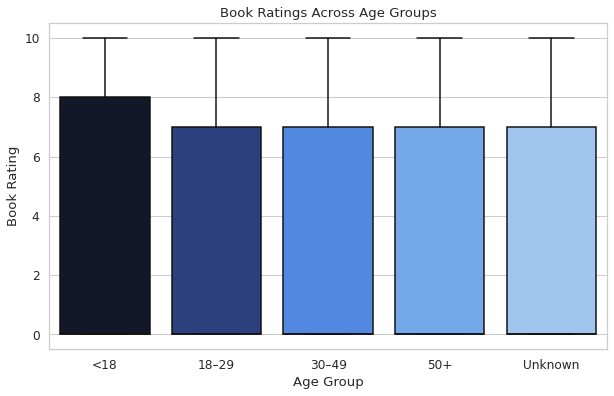

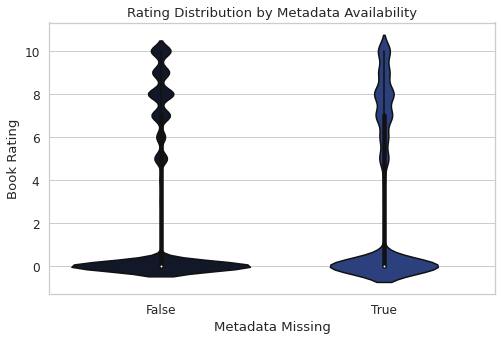

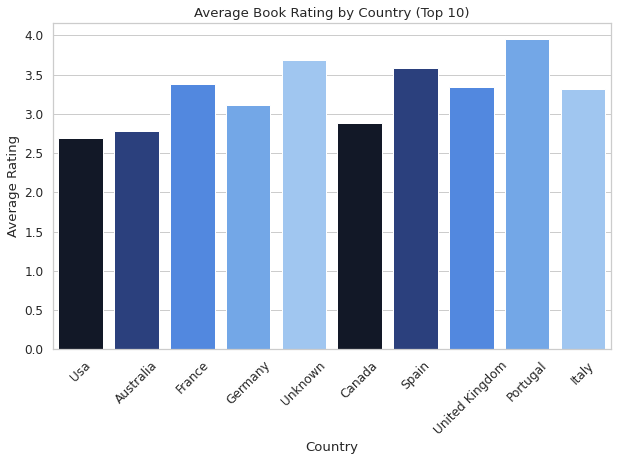

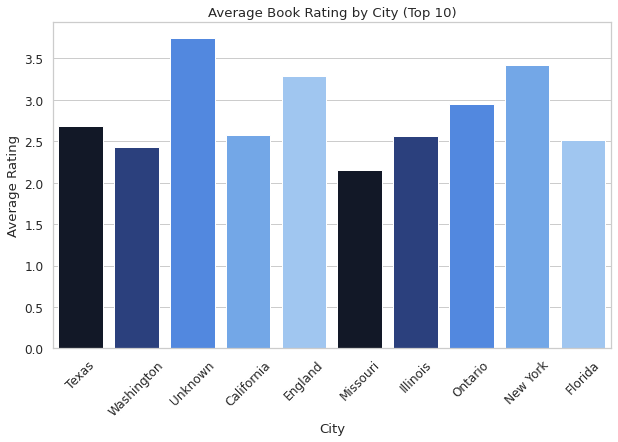

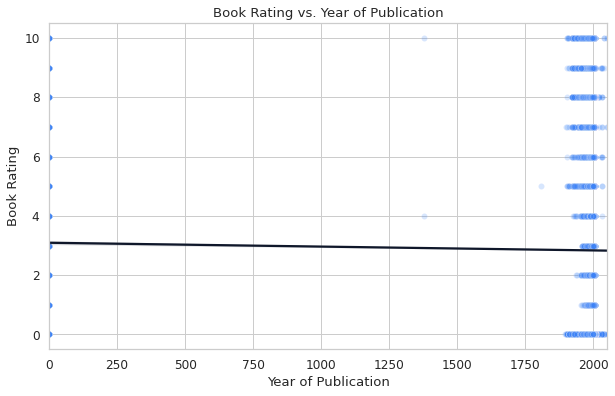

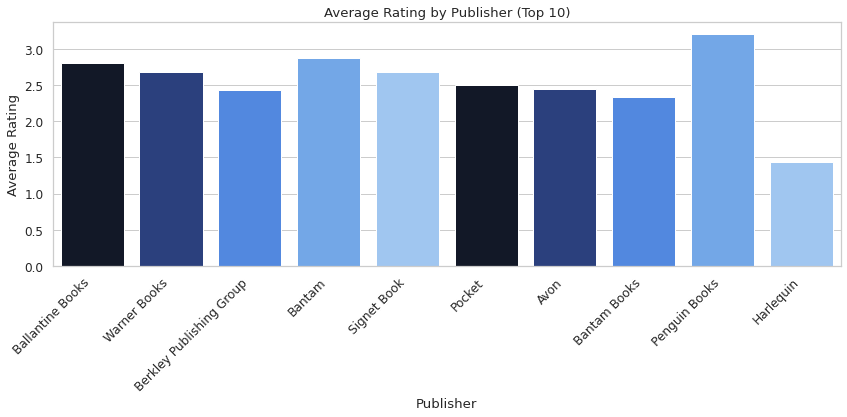

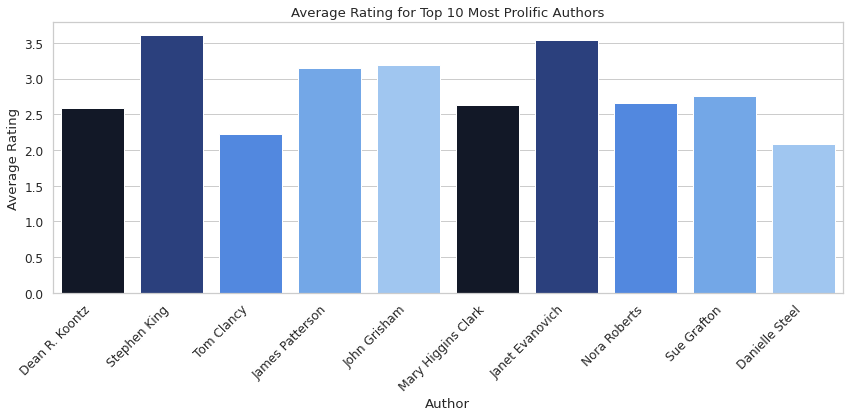

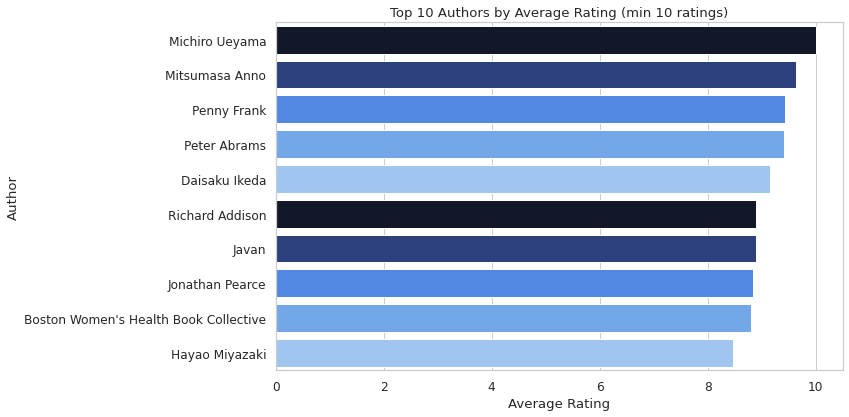

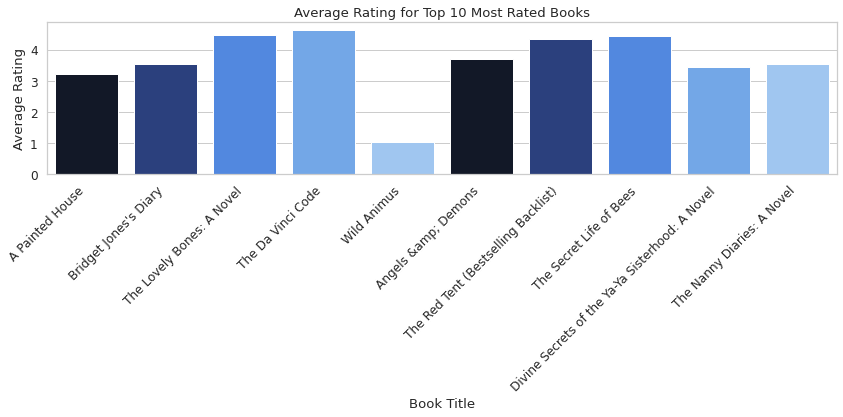

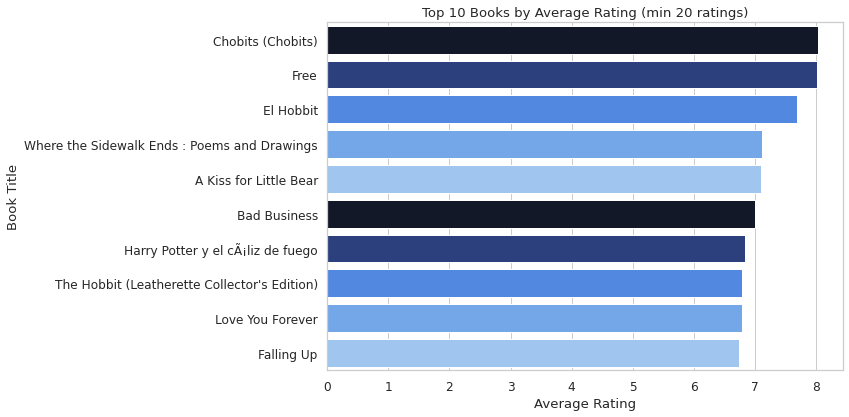

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set aesthetic theme and palette
sns.set_theme(style="whitegrid", font_scale=1.1)
cool_blues = ['#0f172a', '#1e3a8a', '#3b82f6', '#60a5fa', '#93c5fd']
sns.set_palette(cool_blues)

# 1. Book Rating by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Book-Rating', data=merged_df, palette=cool_blues)
plt.title("Book Ratings Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Book Rating")
plt.show()

# 2. Book Rating vs. Missing Metadata
plt.figure(figsize=(8, 5))
sns.violinplot(x='Missing_Metadata', y='Book-Rating', data=merged_df, palette=cool_blues)
plt.title("Rating Distribution by Metadata Availability")
plt.xlabel("Metadata Missing")
plt.ylabel("Book Rating")
plt.show()

# 3. Average Rating per Country (Top 10 by Rating Count)
top_countries = merged_df['Country'].value_counts().head(10).index
top_df = merged_df[merged_df['Country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_df, x='Country', y='Book-Rating', estimator=np.mean, ci=None, palette=cool_blues)
plt.title("Average Book Rating by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# 4. Average Rating by City (Top 10)
top_cities = merged_df['City'].value_counts().head(10).index
city_df = merged_df[merged_df['City'].isin(top_cities)]

plt.figure(figsize=(10, 6))
sns.barplot(data=city_df, x='City', y='Book-Rating', estimator=np.mean, ci=None, palette=cool_blues)
plt.title("Average Book Rating by City (Top 10)")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# 5. Book Rating vs. Year of Publication (Scatter + Trendline)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year-Of-Publication', y='Book-Rating', data=merged_df, alpha=0.2, color=cool_blues[2])
sns.regplot(x='Year-Of-Publication', y='Book-Rating', data=merged_df, scatter=False, color=cool_blues[0])
plt.title("Book Rating vs. Year of Publication")
plt.xlabel("Year of Publication")
plt.ylabel("Book Rating")
plt.show()

# 6. Average Rating by Publisher (Top 10 by Count)
top_publishers = merged_df['Publisher'].value_counts().head(10).index
pub_df = merged_df[merged_df['Publisher'].isin(top_publishers)]

plt.figure(figsize=(12, 6))
sns.barplot(data=pub_df, x='Publisher', y='Book-Rating', estimator=np.mean, ci=None, palette=cool_blues)
plt.title("Average Rating by Publisher (Top 10)")
plt.xlabel("Publisher")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Author Analysis

# a) Top 10 Authors by Number of Books
top_authors_count = merged_df['Book-Author'].value_counts().head(10).index
author_count_df = merged_df[merged_df['Book-Author'].isin(top_authors_count)]

plt.figure(figsize=(12, 6))
sns.barplot(data=author_count_df, x='Book-Author', y='Book-Rating', estimator=np.mean, ci=None, palette=cool_blues)
plt.title("Average Rating for Top 10 Most Prolific Authors")
plt.xlabel("Author")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# b) Top 10 Authors by Average Rating (min 10 ratings to avoid outliers)
author_avg = merged_df.groupby('Book-Author').filter(lambda x: len(x) >= 10)
top_authors_rating = author_avg.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors_rating.values, y=top_authors_rating.index, palette=cool_blues)
plt.title("Top 10 Authors by Average Rating (min 10 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

# 8. Book-Level Analysis

# a) Top 10 Most Rated Books
top_books_count = merged_df['Book-Title'].value_counts().head(10).index
book_count_df = merged_df[merged_df['Book-Title'].isin(top_books_count)]

plt.figure(figsize=(12, 6))
sns.barplot(data=book_count_df, x='Book-Title', y='Book-Rating', estimator=np.mean, ci=None, palette=cool_blues)
plt.title("Average Rating for Top 10 Most Rated Books")
plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# b) Top 10 Books by Average Rating (min 20 ratings)
book_avg = merged_df.groupby('Book-Title').filter(lambda x: len(x) >= 20)
top_books_rating = book_avg.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_books_rating.values, y=top_books_rating.index, palette=cool_blues)
plt.title("Top 10 Books by Average Rating (min 20 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()


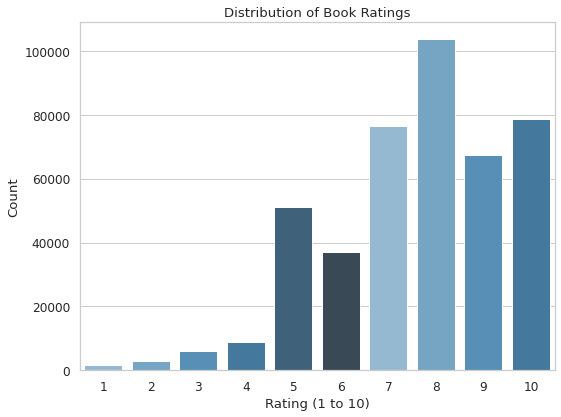

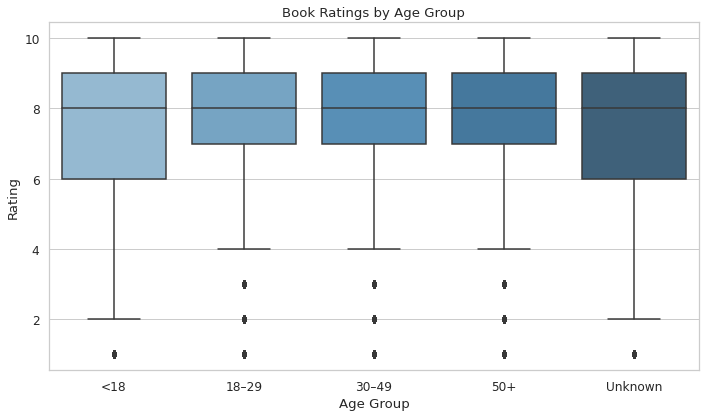

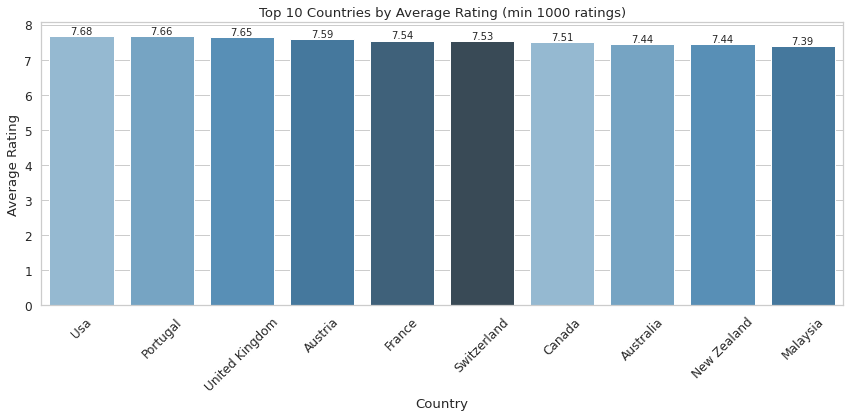

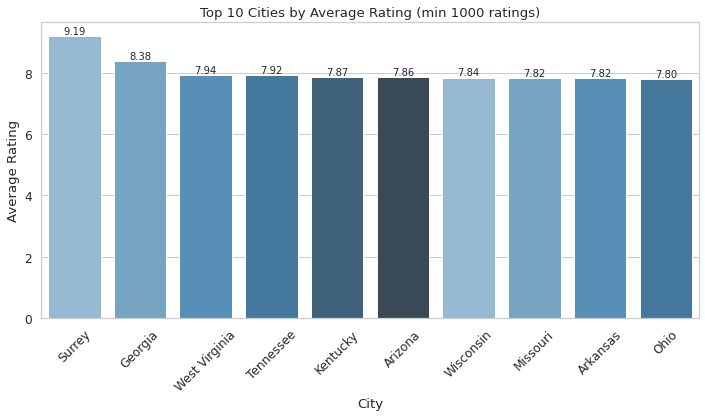

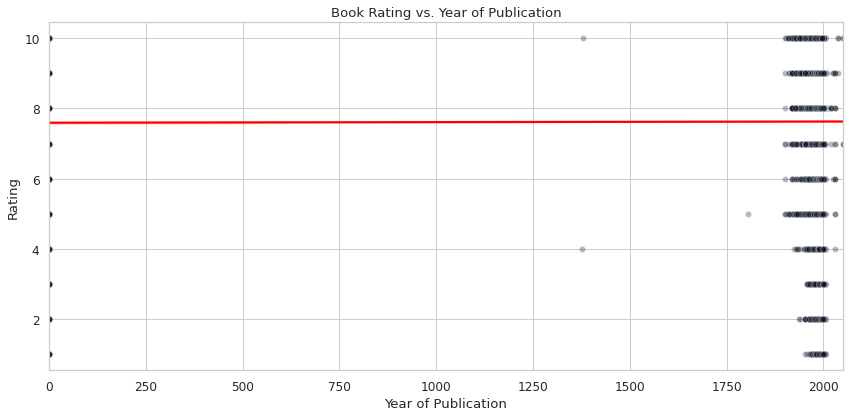

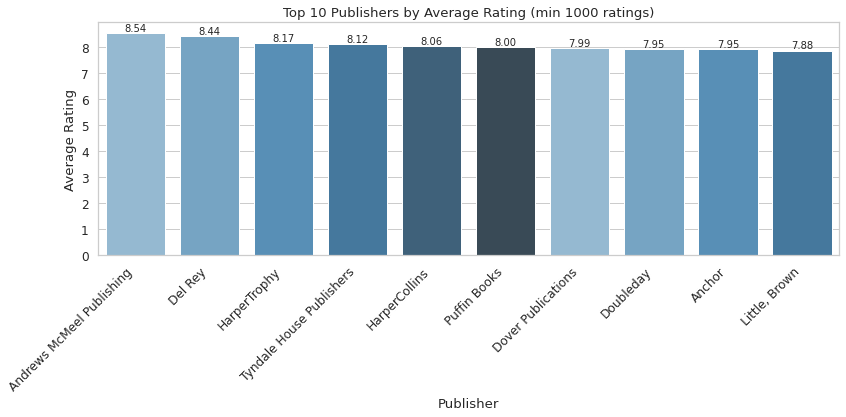

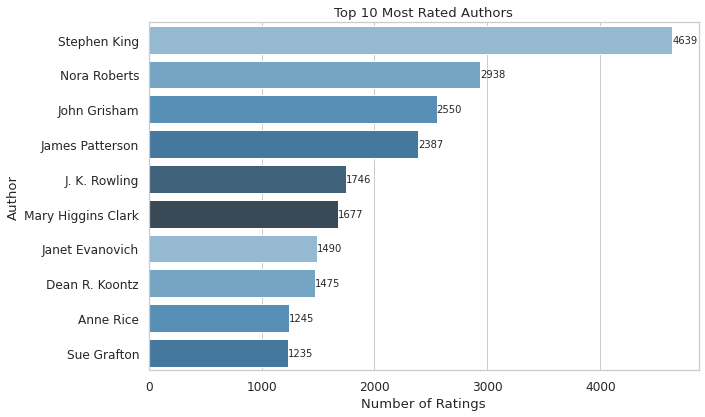

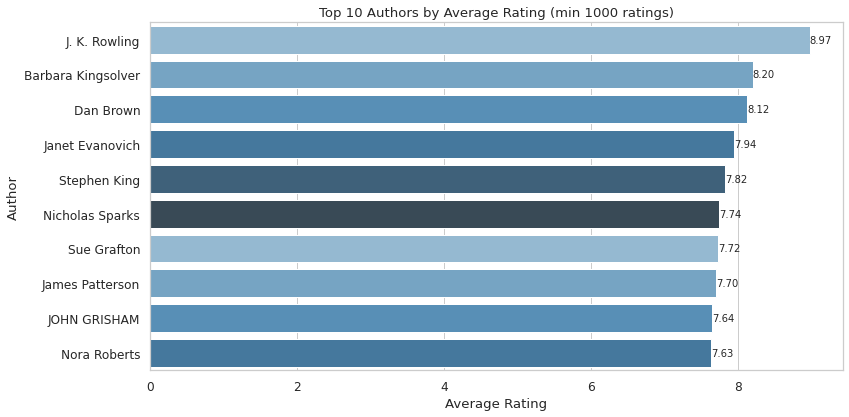

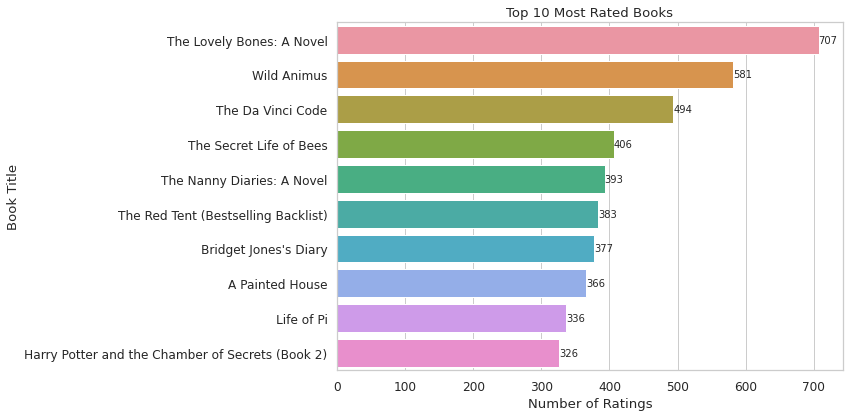

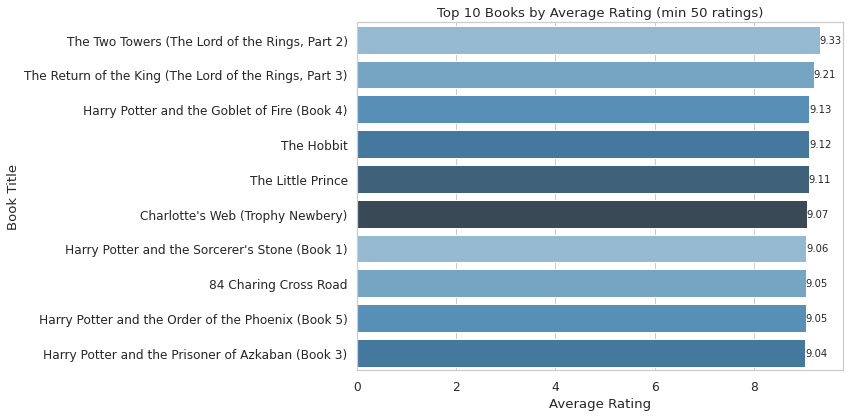

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Color palette
cool_blues = sns.color_palette("Blues_d")

# Filter out 0 ratings (usually not actual ratings)
filtered_df = merged_df[merged_df['Book-Rating'] > 0]

### 1. Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Book-Rating', data=filtered_df, palette=cool_blues)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating (1 to 10)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### 2. Rating Distribution by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Book-Rating', data=filtered_df, palette=cool_blues,
            order=['<18', '18–29', '30–49', '50+', 'Unknown'])
plt.title("Book Ratings by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

### 3. Average Rating by Country (min 1000 ratings)
country_counts = filtered_df.groupby('Country')['Book-Rating'].count()
eligible_countries = country_counts[country_counts >= 1000].index
country_df = filtered_df[filtered_df['Country'].isin(eligible_countries)]

avg_rating_per_country = country_df.groupby('Country')['Book-Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_rating_per_country.index[:10], y=avg_rating_per_country.values[:10], palette=cool_blues)
plt.title("Top 10 Countries by Average Rating (min 1000 ratings)")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 4. Average Rating by City (min 1000 ratings)
city_counts = filtered_df.groupby('City')['Book-Rating'].count()
eligible_cities = city_counts[city_counts >= 1000].index
city_df = filtered_df[filtered_df['City'].isin(eligible_cities)]

top_cities_rating = city_df.groupby('City')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_cities_rating.index, y=top_cities_rating.values, palette=cool_blues)
plt.title("Top 10 Cities by Average Rating (min 1000 ratings)")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 5. Rating vs. Year of Publication (scatter + trend)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year-Of-Publication', y='Book-Rating', data=filtered_df, alpha=0.3)
sns.regplot(x='Year-Of-Publication', y='Book-Rating', data=filtered_df, scatter=False, color='red')
plt.title("Book Rating vs. Year of Publication")
plt.xlabel("Year of Publication")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

### 6. Average Rating by Publisher (min 1000 ratings)
publisher_counts = filtered_df.groupby('Publisher')['Book-Rating'].count()
eligible_publishers = publisher_counts[publisher_counts >= 1000].index
pub_df = filtered_df[filtered_df['Publisher'].isin(eligible_publishers)]

top_pubs_rating = pub_df.groupby('Publisher')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_pubs_rating.index, y=top_pubs_rating.values, palette=cool_blues)
plt.title("Top 10 Publishers by Average Rating (min 1000 ratings)")
plt.xlabel("Publisher")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 7a. Top 10 Most Rated Authors
most_rated_authors = filtered_df['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=most_rated_authors.values, y=most_rated_authors.index, palette=cool_blues)
plt.title("Top 10 Most Rated Authors")
plt.xlabel("Number of Ratings")
plt.ylabel("Author")
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

### 7b. Top 10 Authors by Average Rating (min 1000 ratings)
author_counts = filtered_df.groupby('Book-Author')['Book-Rating'].count()
eligible_authors = author_counts[author_counts >= 1000].index
author_df = filtered_df[filtered_df['Book-Author'].isin(eligible_authors)]

top_authors_rating = author_df.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_authors_rating.values, y=top_authors_rating.index, palette=cool_blues)
plt.title("Top 10 Authors by Average Rating (min 1000 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Author")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

### 8a. Top 10 Most Rated Books
most_rated_books = filtered_df['Book-Title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=most_rated_books.values, y=most_rated_books.index)
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

### 8b. Top 10 Books by Average Rating (min 50 ratings)
book_counts = filtered_df.groupby('Book-Title')['Book-Rating'].count()
eligible_books = book_counts[book_counts >= 50].index
book_df = filtered_df[filtered_df['Book-Title'].isin(eligible_books)]

top_books_rating = book_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_books_rating.values, y=top_books_rating.index, palette=cool_blues)
plt.title("Top 10 Books by Average Rating (min 50 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()


## Observations
*****

## 4.2 Multivariate analysis
## Observations
*****



# 5. Modeling

In [25]:
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
import pandas as pd

# --- Prepare the data ---
ratings_df = merged_df[['User-ID', 'Book-Title', 'Book-Rating']]
ratings_df = ratings_df[ratings_df['Book-Rating'] > 0]  # Filter out 0 ratings (not meaningful)

# --- Memory-Based Collaborative Filtering (KNN) ---
# Filter to keep only books with at least 10 ratings
sampled_df = ratings_df.groupby('Book-Title').filter(lambda x: len(x) >= 10)

# Convert to surprise format
reader = Reader(rating_scale=(1, 10))
sampled_data = Dataset.load_from_df(sampled_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Split train and test sets
trainset, testset = train_test_split(sampled_data, test_size=0.2, random_state=42)

# Fit KNN model (item-based)
knn_model = KNNBasic(k=30, sim_options={'name': 'cosine', 'user_based': False})
knn_model.fit(trainset)
knn_predictions = knn_model.test(testset)

print("🔁 KNN (memory-based CF, item-item, filtered items):")
rmse(knn_predictions)

# --- Model-Based Collaborative Filtering (SVD) ---
svd_model = SVD(n_factors=50, random_state=42)
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)

print("🤖 SVD (model-based CF) RMSE:")
rmse(svd_predictions)

# --- Predict rating for a specific user/book pair ---
sample_user = str(sampled_df['User-ID'].iloc[0])
sample_book = str(sampled_df['Book-Title'].iloc[0])
pred = svd_model.predict(sample_user, sample_book)
print(f"\n🔍 SVD prediction for user {sample_user} on '{sample_book}': {pred.est:.2f}")


Computing the cosine similarity matrix...


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [31]:
merged_df['Age_Group'].value_counts()

30–49      419745
Unknown    313863
18–29      251664
50+        129907
<18         34601
Name: Age_Group, dtype: int64